In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
datos_df = pd.read_csv('datos_yolov4_tiny.csv')
image_folder = "images"
image_files = os.listdir(image_folder)

datos_tf = datos_df[datos_df["class"] == "traffic light"]
print(datos_tf.agg({"confidence": "mean", "tiempo_inferencia": "mean"}))
datos_tf.drop_duplicates(subset=["image_name"], keep="first", inplace=True)
datos_tf.reset_index(drop=True, inplace=True)
print("Imágenes analizadas del total:"+str(datos_tf["image_name"].count())+"/"+str(len(image_files)))

confidence          NaN
tiempo_inferencia   NaN
dtype: float64
Imágenes analizadas del total:0/236


In [9]:
datos_df = pd.read_csv('datos.csv')
datos_tf.plot.hist(y="tiempo_inferencia", bins=20).title.set_text("Histograma de tiempo de inferencia (s)")

TypeError: no numeric data to plot

In [10]:
datos_tf.plot.hist(y="confidence")

TypeError: no numeric data to plot

<Axes: ylabel='count'>

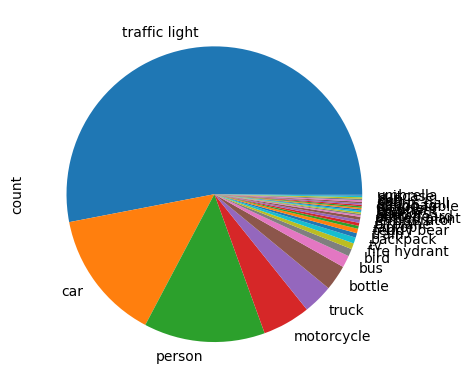

In [11]:
class_counts = datos_df['class'].value_counts()
class_counts.plot.pie()

In [12]:
precision = datos_tf.count()/len(image_files)
print("Precisión: "+str(precision["image_name"]))

Precisión: 0.0
